In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# https://drive.google.com/file/d/1bk0-g8L3gk1u8HyqK78yp3F-ioA3IKJ6/view?usp=drive_link
#https://drive.google.com/file/d/1Pa3RXbsnArwtPh_TsVempjILZ3X2ljXt/view?usp=drive_link
#https://drive.google.com/file/d/1JKtEz2wbv2soIc3jDmn4QJz6wuJpLlY0/view?usp=drive_link

In [ ]:
!gdown 1bk0-g8L3gk1u8HyqK78yp3F-ioA3IKJ6

Downloading...
From: https://drive.google.com/uc?id=1bk0-g8L3gk1u8HyqK78yp3F-ioA3IKJ6
To: /content/zee-movies.dat
100% 171k/171k [00:00<00:00, 66.1MB/s]


In [ ]:
!gdown 1Pa3RXbsnArwtPh_TsVempjILZ3X2ljXt

Downloading...
From: https://drive.google.com/uc?id=1Pa3RXbsnArwtPh_TsVempjILZ3X2ljXt
To: /content/zee-ratings.dat
100% 24.6M/24.6M [00:00<00:00, 98.9MB/s]


In [ ]:
!gdown 1JKtEz2wbv2soIc3jDmn4QJz6wuJpLlY0

Downloading...
From: https://drive.google.com/uc?id=1JKtEz2wbv2soIc3jDmn4QJz6wuJpLlY0
To: /content/zee-users.dat
100% 134k/134k [00:00<00:00, 41.2MB/s]


In [ ]:
pd.set_option("display.max_columns", None)


In [ ]:
ratings_columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
ratings = pd.read_csv('/content/zee-ratings.dat', sep='::', names=ratings_columns, engine='python',skiprows=1)
print(ratings.head())


   UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291


In [ ]:
users_columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
users = pd.read_csv('zee-users.dat', sep='::', names=users_columns, engine='python',skiprows=1)
print(users.head())


   UserID Gender  Age  Occupation Zip-code
0       1      F    1          10    48067
1       2      M   56          16    70072
2       3      M   25          15    55117
3       4      M   45           7    02460
4       5      M   25          20    55455


In [ ]:
movies_columns = ['MovieID', 'Title', 'Genres']
movies = pd.read_csv('zee-movies.dat', sep='::', names=movies_columns, engine='python',skiprows=1,encoding='latin-1')
print(movies.head())

   MovieID                               Title                        Genres
0        1                    Toy Story (1995)   Animation|Children's|Comedy
1        2                      Jumanji (1995)  Adventure|Children's|Fantasy
2        3             Grumpier Old Men (1995)                Comedy|Romance
3        4            Waiting to Exhale (1995)                  Comedy|Drama
4        5  Father of the Bride Part II (1995)                        Comedy


In [ ]:
ratings.head()

UserID  MovieID  Rating  Timestamp
0       1     1193       5  978300760
1       1      661       3  978302109
2       1      914       3  978301968
3       1     3408       4  978300275
4       1     2355       5  978824291

In [ ]:
# creating a new dataframe

# Step 1: Merge `ratings` with `users` on `user_id`
ratings_users = pd.merge(ratings, users, on='UserID', how='inner')

# Step 2: Merge the result with `movies` on `movie_id`
final_df = pd.merge(ratings_users, movies, on='MovieID', how='inner')

# Display the final merged DataFrame
print(final_df.head())



   UserID  MovieID  Rating  Timestamp Gender  Age  Occupation Zip-code  \
0       1     1193       5  978300760      F    1          10    48067   
1       1      661       3  978302109      F    1          10    48067   
2       1      914       3  978301968      F    1          10    48067   
3       1     3408       4  978300275      F    1          10    48067   
4       1     2355       5  978824291      F    1          10    48067   

                                    Title                        Genres  
0  One Flew Over the Cuckoo's Nest (1975)                         Drama  
1        James and the Giant Peach (1996)  Animation|Children's|Musical  
2                     My Fair Lady (1964)               Musical|Romance  
3                  Erin Brockovich (2000)                         Drama  
4                    Bug's Life, A (1998)   Animation|Children's|Comedy  


# **FEATURE ENGINEERING**

In [ ]:
final_df['Timestamp'] = pd.to_datetime(final_df['Timestamp'], unit='s')


In [ ]:
final_df.head()

UserID  MovieID  Rating           Timestamp Gender  Age  Occupation  \
0       1     1193       5 2000-12-31 22:12:40      F    1          10   
1       1      661       3 2000-12-31 22:35:09      F    1          10   
2       1      914       3 2000-12-31 22:32:48      F    1          10   
3       1     3408       4 2000-12-31 22:04:35      F    1          10   
4       1     2355       5 2001-01-06 23:38:11      F    1          10   

  Zip-code                                   Title  \
0    48067  One Flew Over the Cuckoo's Nest (1975)   
1    48067        James and the Giant Peach (1996)   
2    48067                     My Fair Lady (1964)   
3    48067                  Erin Brockovich (2000)   
4    48067                    Bug's Life, A (1998)   

                         Genres  
0                         Drama  
1  Animation|Children's|Musical  
2               Musical|Romance  
3                         Drama  
4   Animation|Children's|Comedy

In [ ]:
final_df['Day'] = final_df['Timestamp'].dt.day
final_df['Month'] = final_df['Timestamp'].dt.month
final_df['Year'] = final_df['Timestamp'].dt.year
final_df['Hour'] = final_df['Timestamp'].dt.hour


In [ ]:
final_df.head()

UserID  MovieID  Rating           Timestamp Gender  Age  Occupation  \
0       1     1193       5 2000-12-31 22:12:40      F    1          10   
1       1      661       3 2000-12-31 22:35:09      F    1          10   
2       1      914       3 2000-12-31 22:32:48      F    1          10   
3       1     3408       4 2000-12-31 22:04:35      F    1          10   
4       1     2355       5 2001-01-06 23:38:11      F    1          10   

  Zip-code                                   Title  \
0    48067  One Flew Over the Cuckoo's Nest (1975)   
1    48067        James and the Giant Peach (1996)   
2    48067                     My Fair Lady (1964)   
3    48067                  Erin Brockovich (2000)   
4    48067                    Bug's Life, A (1998)   

                         Genres  Day  Month  Year  Hour  
0                         Drama   31     12  2000    22  
1  Animation|Children's|Musical   31     12  2000    22  
2               Musical|Romance   31     12  2000    22  
3                         Drama   31     12  2000    22  
4   Animation|Children's|Comedy    6      1  2001    23

In [ ]:
final_df['Age'].value_counts()

Age
25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: count, dtype: int64

In [ ]:
age_groups = {
    1: "Under 18",
    18: "18-24",
    25: "25-34",
    35: "35-44",
    45: "45-49",
    50: "50-55",
    56: "56 Above"
}
final_df['AgeGroup'] = final_df['Age'].map(age_groups)


In [ ]:
final_df['Occupation'].value_counts()

Occupation
4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: count, dtype: int64

In [ ]:
final_df['Occupation'] = final_df['Occupation'].astype(str)

In [ ]:
occupation = {'0': "other",
                  '1': "academic/educator",
                  '2': "artist",
                  '3': "clerical/admin",
                  '4': "college/grad student",
                  '5': "customer service",
                  '6': "doctor/health care",
                  '7': "executive/managerial",
                  '8': "farmer",
                  '9': "homemaker",
                  '10': "k-12 student",
                  '11': "lawyer",
                  '12': "programmer",
                  '13': "retired",
                  '14': "sales/marketing",
                  '15': "scientist",
                  '16': "self-employed",
                  '17': "technician/engineer",
                  '18': "tradesman/craftsman",
                  '19': "unemployed",
                  '20': "writer"}



In [ ]:
final_df['Occupation'] = final_df['Occupation'].map(occupation)


In [ ]:
final_df.head()

UserID  MovieID  Rating           Timestamp Gender  Age    Occupation  \
0       1     1193       5 2000-12-31 22:12:40      F    1  k-12 student   
1       1      661       3 2000-12-31 22:35:09      F    1  k-12 student   
2       1      914       3 2000-12-31 22:32:48      F    1  k-12 student   
3       1     3408       4 2000-12-31 22:04:35      F    1  k-12 student   
4       1     2355       5 2001-01-06 23:38:11      F    1  k-12 student   

  Zip-code                                   Title  \
0    48067  One Flew Over the Cuckoo's Nest (1975)   
1    48067        James and the Giant Peach (1996)   
2    48067                     My Fair Lady (1964)   
3    48067                  Erin Brockovich (2000)   
4    48067                    Bug's Life, A (1998)   

                         Genres  Day  Month  Year  Hour  AgeGroup  
0                         Drama   31     12  2000    22  Under 18  
1  Animation|Children's|Musical   31     12  2000    22  Under 18  
2               Musical|Romance   31     12  2000    22  Under 18  
3                         Drama   31     12  2000    22  Under 18  
4   Animation|Children's|Comedy    6      1  2001    23  Under 18

In [ ]:
final_df['Genres'].unique().tolist()

['Drama',
 "Animation|Children's|Musical",
 'Musical|Romance',
 "Animation|Children's|Comedy",
 'Action|Adventure|Comedy|Romance',
 'Action|Adventure|Drama',
 'Comedy|Drama',
 "Adventure|Children's|Drama|Musical",
 'Musical',
 'Comedy',
 "Animation|Children's",
 'Comedy|Fantasy',
 'Animation',
 'Comedy|Sci-Fi',
 'Drama|War',
 'Romance',
 "Animation|Children's|Musical|Romance",
 "Children's|Drama|Fantasy|Sci-Fi",
 'Drama|Romance',
 'Animation|Comedy|Thriller',
 "Adventure|Animation|Children's|Comedy|Musical",
 "Animation|Children's|Comedy|Musical",
 'Thriller',
 'Action|Crime|Romance',
 'Action|Adventure|Fantasy|Sci-Fi',
 "Children's|Comedy|Musical",
 'Action|Drama|War',
 "Children's|Drama",
 'Crime|Drama|Thriller',
 'Action|Crime|Drama',
 'Action|Adventure|Mystery',
 'Crime|Drama',
 'Action|Adventure|Sci-Fi|Thriller',
 'Action|Adventure|Romance|Sci-Fi|War',
 'Action|Thriller',
 'Action|Drama',
 'Comedy|Drama|Western',
 'Action|Adventure|Crime',
 'Action|Crime|Mystery|Thriller',
 'Comed

In [ ]:
final_df['Genres'] = final_df['Genres'].str.split('|')

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_matrix = mlb.fit_transform(final_df['Genres'])
genre_df = pd.DataFrame(genre_matrix, columns=mlb.classes_, index=final_df.index)
df_movies = pd.concat([final_df, genre_df], axis=1)


In [ ]:
df_main = df_movies.copy()

In [ ]:
df_main['Movie_Year'] = df_main['Title'].str.extract(r'\((\d{4})\)')


In [ ]:
df_main['Title'] = df_main['Title'].str.replace(r'\(.*$', '', regex=True)


In [ ]:
df_main.head()

UserID  MovieID  Rating           Timestamp Gender  Age    Occupation  \
0       1     1193       5 2000-12-31 22:12:40      F    1  k-12 student   
1       1      661       3 2000-12-31 22:35:09      F    1  k-12 student   
2       1      914       3 2000-12-31 22:32:48      F    1  k-12 student   
3       1     3408       4 2000-12-31 22:04:35      F    1  k-12 student   
4       1     2355       5 2001-01-06 23:38:11      F    1  k-12 student   

  Zip-code                             Title  \
0    48067  One Flew Over the Cuckoo's Nest    
1    48067        James and the Giant Peach    
2    48067                     My Fair Lady    
3    48067                  Erin Brockovich    
4    48067                    Bug's Life, A    

                             Genres  Day  Month  Year  Hour  AgeGroup  Action  \
0                           [Drama]   31     12  2000    22  Under 18       0   
1  [Animation, Children's, Musical]   31     12  2000    22  Under 18       0   
2                [Musical, Romance]   31     12  2000    22  Under 18       0   
3                           [Drama]   31     12  2000    22  Under 18       0   
4   [Animation, Children's, Comedy]    6      1  2001    23  Under 18       0   

   Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  \
0          0          0           0       0      0            0      1   
1          0          1           1       0      0            0      0   
2          0          0           0       0      0            0      0   
3          0          0           0       0      0            0      1   
4          0          1           1       1      0            0      0   

   Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
0        0          0       0        0        0        0       0         0   
1        0          0       0        1        0        0       0         0   
2        0          0       0        1        0        1       0         0   
3        0          0       0        0        0        0       0         0   
4        0          0       0        0        0        0       0         0   

   War  Western Movie_Year  
0    0        0       1975  
1    0        0       1996  
2    0        0       1964  
3    0        0       2000  
4    0        0       1998

In [ ]:
df_main.columns.tolist()

['UserID',
 'MovieID',
 'Rating',
 'Timestamp',
 'Gender',
 'Age',
 'Occupation',
 'Zip-code',
 'Title',
 'Genres',
 'Day',
 'Month',
 'Year',
 'Hour',
 'AgeGroup',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'Movie_Year']

# **DATA VISUALIZATION**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

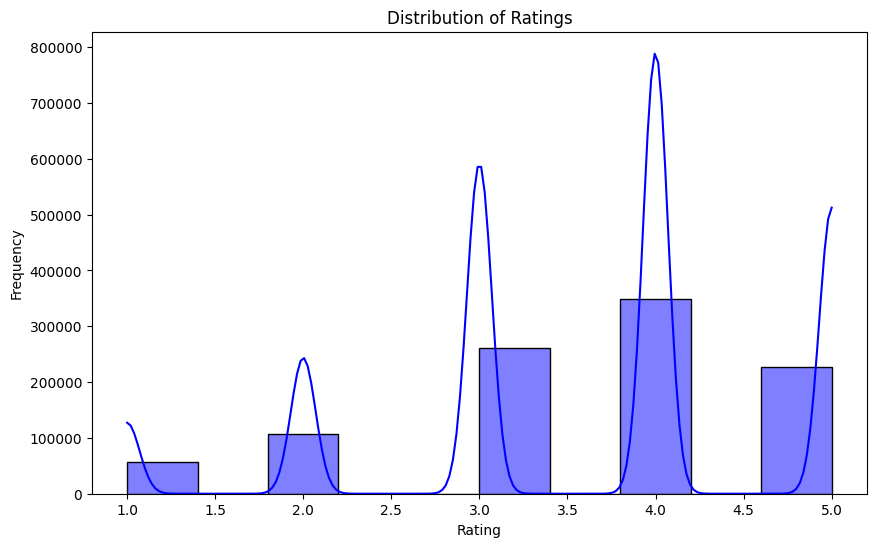

In [ ]:

# Visualization 1: Distribution of Ratings
plt.figure(figsize=(10, 6))
sns.histplot(df_main['Rating'], bins=10, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

Rating 4 is the most commonly occuring rating followed by 3

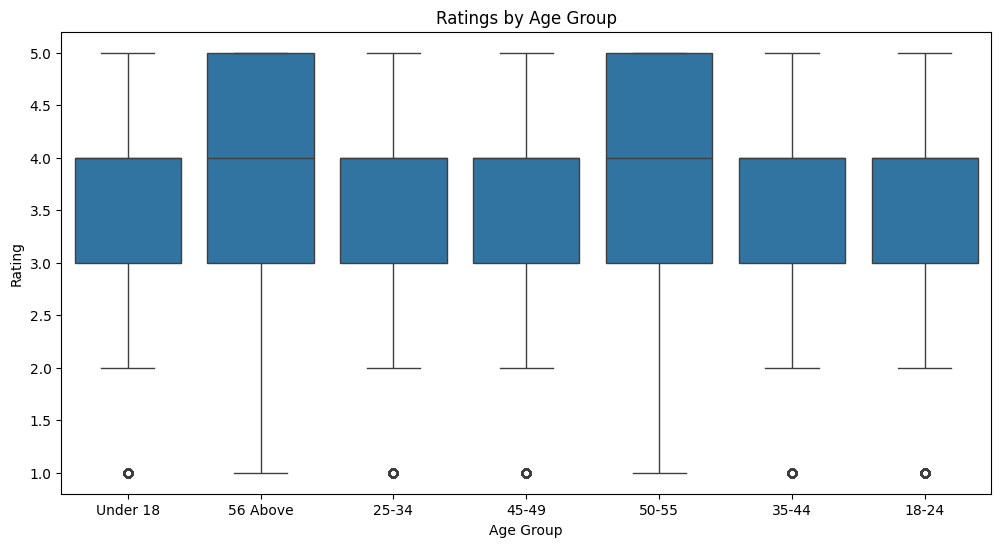

In [ ]:
# Visualization 2: Ratings by Age Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='AgeGroup', y='Rating', data=df_main)
plt.title('Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Rating')
plt.show()

# ***For most of the age-groups,the rating is between 3 and 4 except 50 and above - where the rating ranges from 3 to 5***

---



In [ ]:
import ast
unique_genres = set()
for i in df_main['Genres']:
    # Convert string to a list using ast.literal_eval
    for j in i:
        unique_genres.add(j)


In [ ]:
unique_genres = list(unique_genres)

In [ ]:
# # Assuming each genre column (like 'Action', 'Adventure', etc.) contains 1 or 0 based on if the movie is in that genre
genre_columns = unique_genres

In [ ]:
import pandas as pd

# Sample dataframe (replace with your actual df)
# df = pd.read_csv('your_data.csv')

# Calculate the unique count of MovieID for each genre
genre_unique_counts = {}

for genre in genre_columns:
    # Filter rows where the genre column is 1 (movie belongs to that genre)
    genre_unique_counts[genre] = df_main[df_main[genre] == 1]['MovieID'].nunique()

# Convert the result to a pandas Series for better readability
genre_unique_counts = pd.Series(genre_unique_counts)

# Print the unique counts of MovieID for each genre
print(genre_unique_counts)


Children's      250
Thriller        485
Horror          339
Drama          1493
Adventure       281
Action          495
Comedy         1163
Fantasy          68
War             141
Crime           201
Mystery         104
Film-Noir        44
Musical         113
Romance         459
Animation       105
Sci-Fi          274
Documentary     110
Western          67
dtype: int64


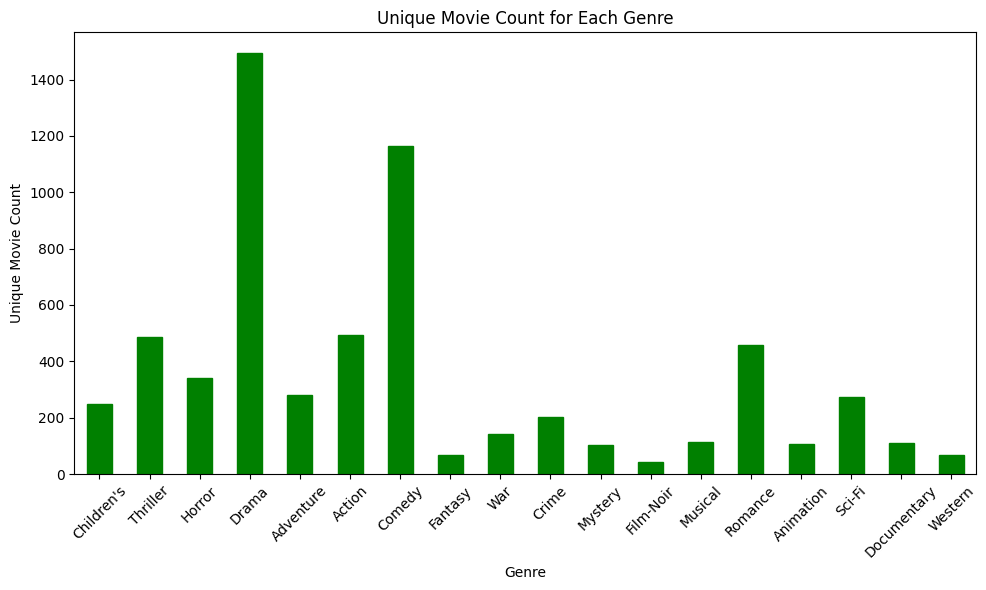

In [ ]:
# Plot the bar graph
plt.figure(figsize=(10, 6))
genre_unique_counts.plot(kind='bar', color='green', edgecolor='green')
plt.title('Unique Movie Count for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Unique Movie Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
exploded_df = df_main.explode('Genres')



In [ ]:
df_main.head()

UserID  MovieID  Rating           Timestamp Gender  Age    Occupation  \
0       1     1193       5 2000-12-31 22:12:40      F    1  k-12 student   
1       1      661       3 2000-12-31 22:35:09      F    1  k-12 student   
2       1      914       3 2000-12-31 22:32:48      F    1  k-12 student   
3       1     3408       4 2000-12-31 22:04:35      F    1  k-12 student   
4       1     2355       5 2001-01-06 23:38:11      F    1  k-12 student   

  Zip-code                             Title  \
0    48067  One Flew Over the Cuckoo's Nest    
1    48067        James and the Giant Peach    
2    48067                     My Fair Lady    
3    48067                  Erin Brockovich    
4    48067                    Bug's Life, A    

                             Genres  Day  Month  Year  Hour  AgeGroup  Action  \
0                           [Drama]   31     12  2000    22  Under 18       0   
1  [Animation, Children's, Musical]   31     12  2000    22  Under 18       0   
2                [Musical, Romance]   31     12  2000    22  Under 18       0   
3                           [Drama]   31     12  2000    22  Under 18       0   
4   [Animation, Children's, Comedy]    6      1  2001    23  Under 18       0   

   Adventure  Animation  Children's  Comedy  Crime  Documentary  Drama  \
0          0          0           0       0      0            0      1   
1          0          1           1       0      0            0      0   
2          0          0           0       0      0            0      0   
3          0          0           0       0      0            0      1   
4          0          1           1       1      0            0      0   

   Fantasy  Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  \
0        0          0       0        0        0        0       0         0   
1        0          0       0        1        0        0       0         0   
2        0          0       0        1        0        1       0         0   
3        0          0       0        0        0        0       0         0   
4        0          0       0        0        0        0       0         0   

   War  Western  Movie_Year decade  
0    0        0        1975   1970  
1    0        0        1996   1990  
2    0        0        1964   1960  
3    0        0        2000   1990  
4    0        0        1998   1990

**DRAMA AND COMEDY ARE THE MOST COMMONLY OCCURING GENRES**

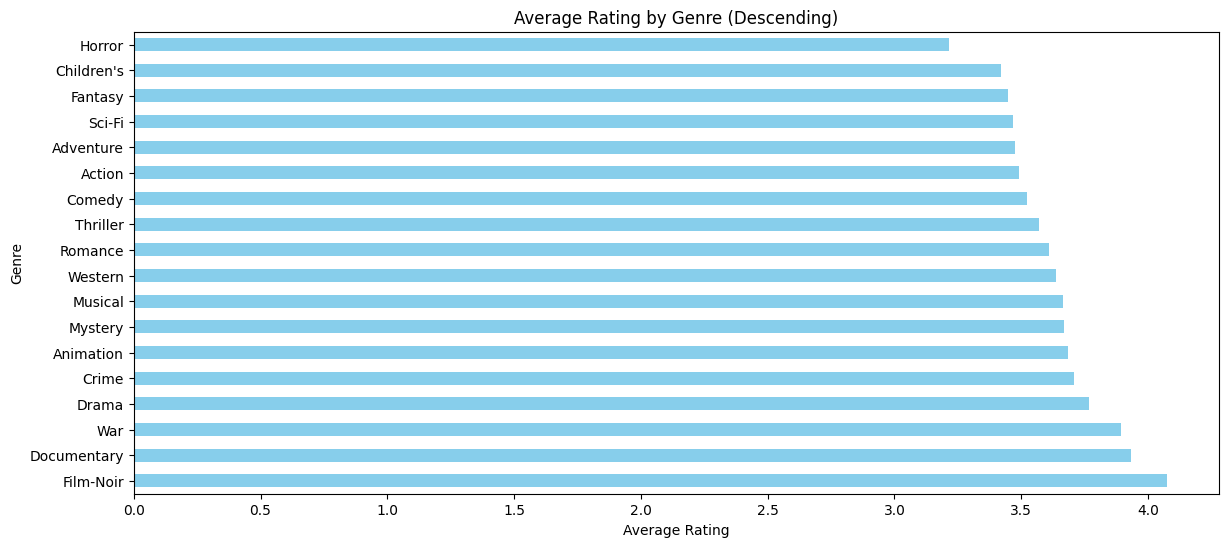

In [ ]:
genre_avg_ratings = exploded_df.groupby('Genres')['Rating'].mean().sort_values(ascending=False)  # Sort by descending order

# Visualization: Bar plot of average rating by occupation
plt.figure(figsize=(14, 6))
genre_avg_ratings.plot(kind='barh', color='skyblue')
plt.title('Average Rating by Genre (Descending)')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

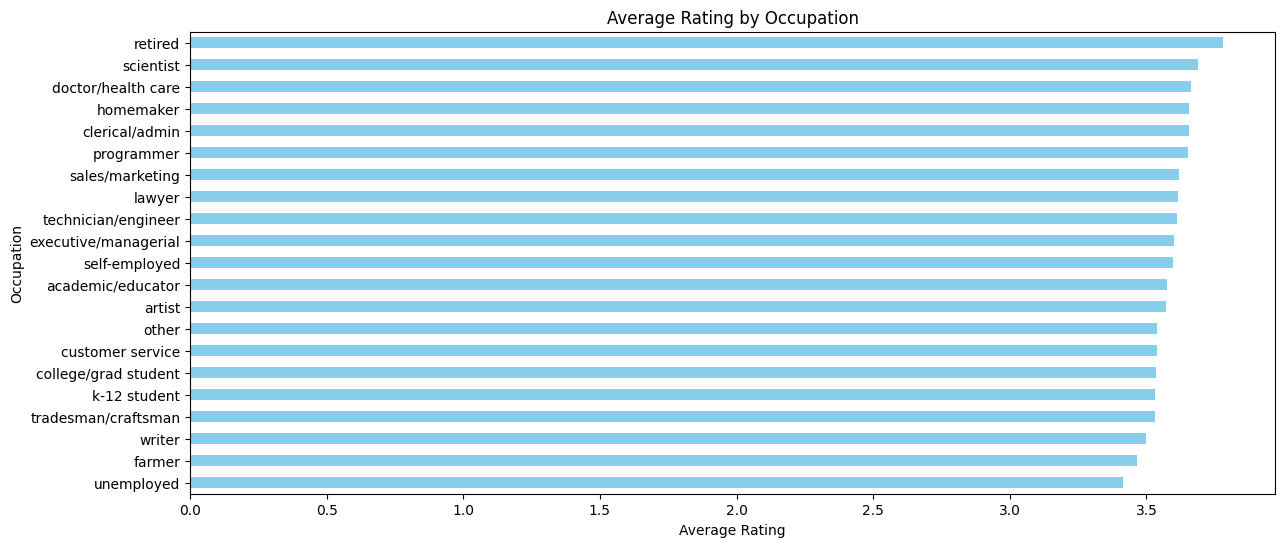

In [ ]:
occupation_avg_ratings = df_main.groupby('Occupation')['Rating'].mean()

# Visualization: Bar plot of average rating by occupation
plt.figure(figsize=(14, 6))
occupation_avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Rating by Occupation')
plt.xlabel('Average Rating')
plt.ylabel('Occupation')
plt.show()

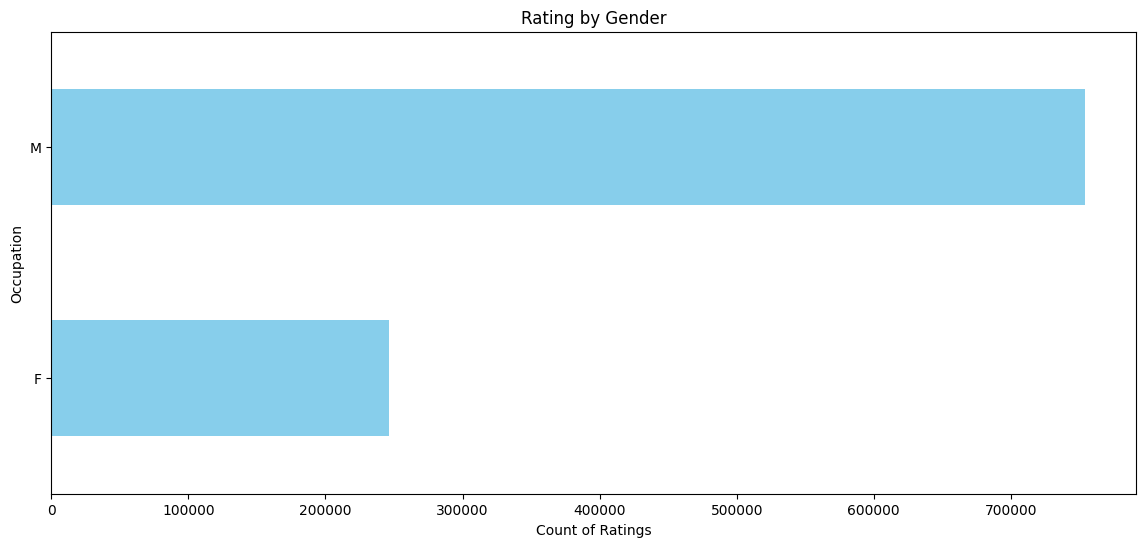

In [ ]:
gender_avg_ratings = df_main.groupby('Gender')['Rating'].count()

# Visualization: Bar plot of average rating by occupation
plt.figure(figsize=(14, 6))
gender_avg_ratings.sort_values().plot(kind='barh', color='skyblue')
plt.title('Rating by Gender')
plt.xlabel('Count of Ratings')
plt.ylabel('Occupation')
plt.show()

In [ ]:
# import pandas as pd
# import requests


# # Function to get country and state from ZIP code
# def get_zipcode_info(zipcode):
#     url = f"http://api.zippopotam.us/us/{zipcode}"
#     try:
#         response = requests.get(url)
#         if response.status_code == 200:
#             data = response.json()
#             country = data['country']
#             state = data['places'][0]['state']
#             return state, country
#         else:
#             return None, None
#     except Exception as e:
#         print(f"Error with zipcode {zipcode}: {e}")
#         return None, None

# # Create new columns 'state' and 'country'
# df_main[['state', 'country']] = df_main['Zip-code'].apply(lambda x: pd.Series(get_zipcode_info(x)))

# # Print the resulting DataFrame
# print(df_main)


In [ ]:
# zipcode_avg_ratings = df_main.groupby('Zip-code')['Rating'].mean()

# # Visualization: Bar plot of average rating by occupation
# plt.figure(figsize=(14, 6))
# zipcode_avg_ratings.sort_values().plot(kind='barh', color='skyblue')
# plt.title('Average Rating by Zipcode')
# plt.xlabel('Average Rating')
# plt.ylabel('Zip-code')
# plt.show()

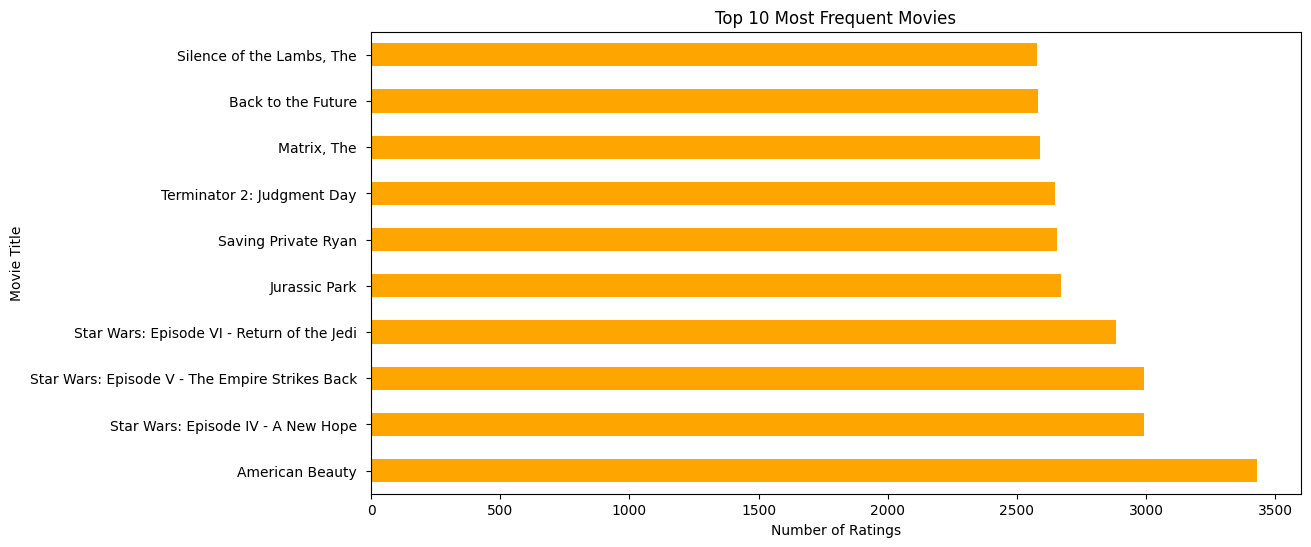

In [ ]:
# Visualization 7: Most Frequent Movies
top_movies = df_main['Title'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top_movies.plot(kind='barh', color='orange')
plt.title('Top 10 Most Frequent Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


<ipython-input-170-0e3d014fe324>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Hour', data=df_main, palette='viridis')


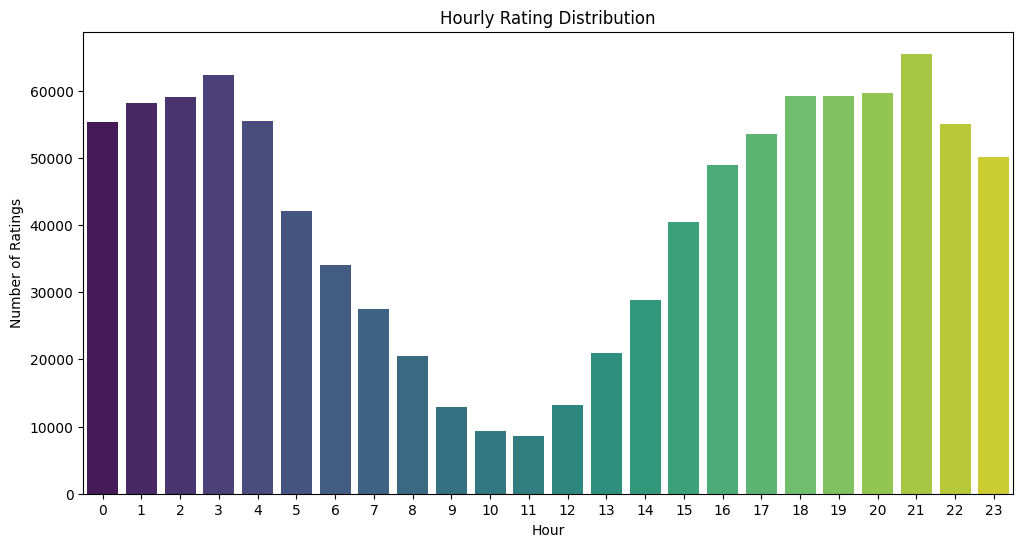

In [ ]:
# Visualization 8: Hourly Rating Distribution
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df_main, palette='viridis')
plt.title('Hourly Rating Distribution')
plt.xlabel('Hour')
plt.ylabel('Number of Ratings')
plt.show()


***Users mostly rate movies after 6 PM and till 3 AM in the night which aligns with the viewership hours***

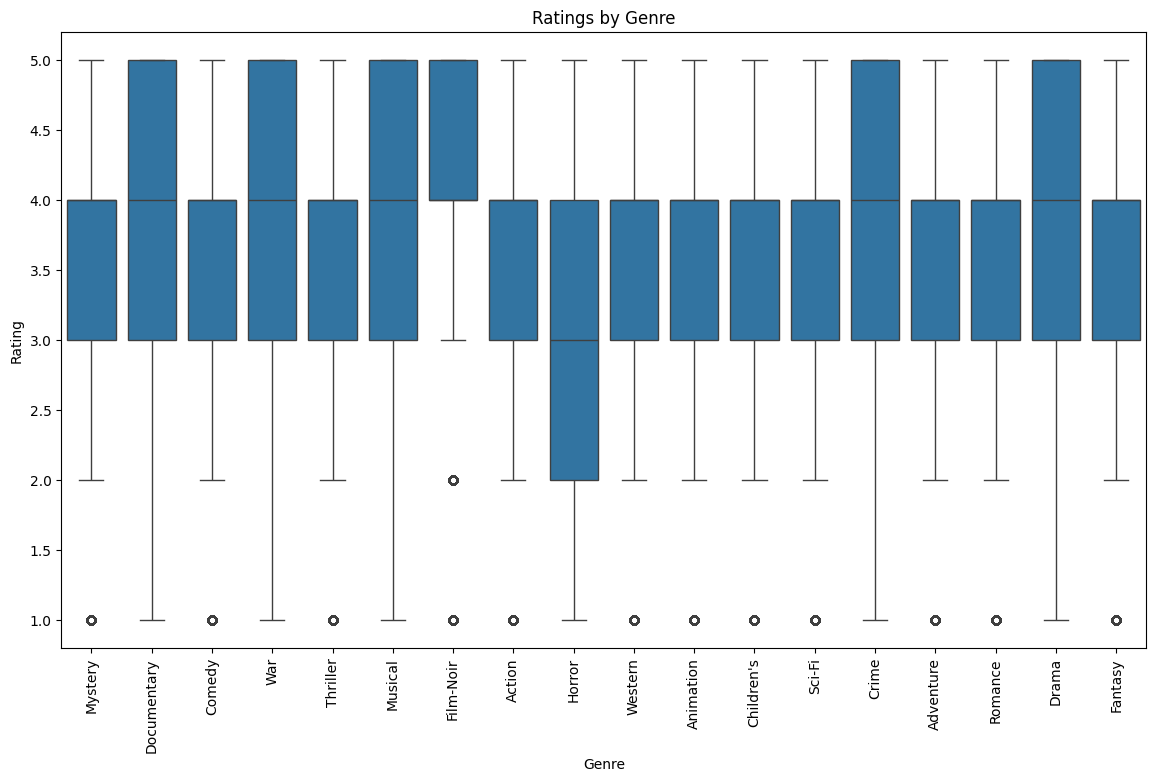

In [ ]:
# Visualization 9: Movie Genre vs Rating (Violin Plot)
df_long = df_main.melt(id_vars=['Rating'], value_vars=genre_columns, var_name='Genre', value_name='HasGenre')
df_long = df_long[df_long['HasGenre'] == 1]  # Filter rows where genre is 1

plt.figure(figsize=(14, 8))
sns.boxplot(x='Genre', y='Rating', data=df_long)
plt.title('Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=90)
plt.show()


***Horror movies have comparatively poor ratings(2 TO 4) while DRAMA,CRIME, DOCUMENTARY AND MOVIES HAVE RATINGS RANGING FROM 3 TO 5.Rest of the genres have ratings between 3 and 4***

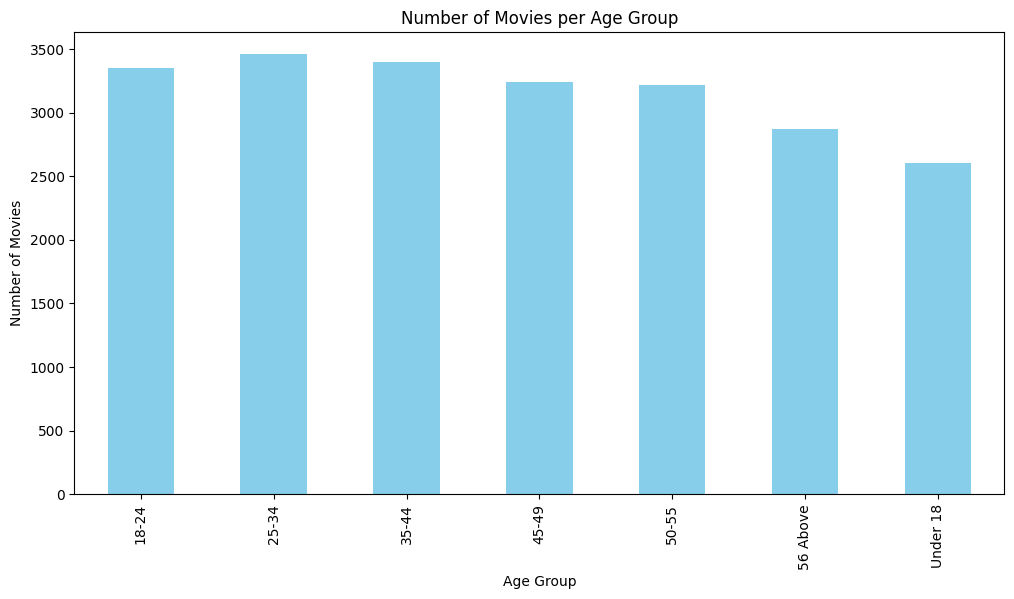

In [ ]:
# Visualization 10: Age Group vs Movie Count
age_group_movie_count = df_main.groupby('AgeGroup')['Title'].nunique()
plt.figure(figsize=(12, 6))
age_group_movie_count.plot(kind='bar', color='skyblue')
plt.title('Number of Movies per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Movies')
plt.show()


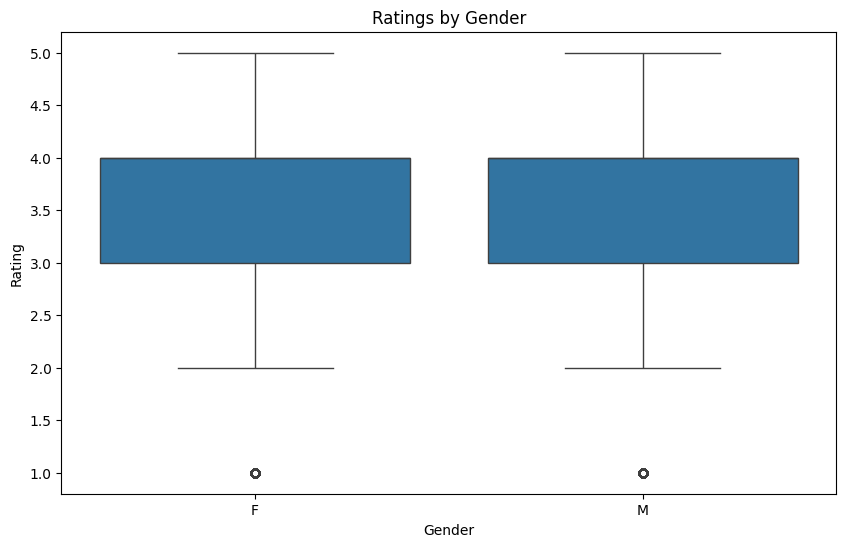

In [ ]:
# Visualization 4: Ratings by Gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Rating', data=df_main)
plt.title('Ratings by Gender')
plt.xlabel('Gender')
plt.ylabel('Rating')
plt.show()


In [ ]:
df_main.groupby('Movie_Year')['MovieID'].count()

Movie_Year
1919       45
1920       24
1921       62
1922      238
1923       17
        ...  
1996    59382
1997    65402
1998    68226
1999    86833
2000    41000
Name: MovieID, Length: 81, dtype: int64

In [ ]:
df_main['Movie_Year'] = df_main['Movie_Year'].apply(lambda x: int(x) if pd.notna(x) else x)

bins = list(range(1950, 2030, 10))

# Create labels for each decade
labels = [f'{decade}' for decade in bins[:-1]]


# Use pd.cut to create the decade groups
df_main['decade'] = pd.cut(df_main['Movie_Year'], bins=bins, labels=labels, include_lowest=True)


In [ ]:
df_main.groupby('decade')['MovieID'].count()

<ipython-input-45-45102962fb84>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_main.groupby('decade')['MovieID'].count()


decade
1950     38774
1960     49483
1970     94321
1980    238134
1990    543526
2000         0
2010         0
Name: MovieID, dtype: int64

<ipython-input-46-a531541e73fd>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  movie_counts_by_year = df_main.groupby('decade')['MovieID'].count()


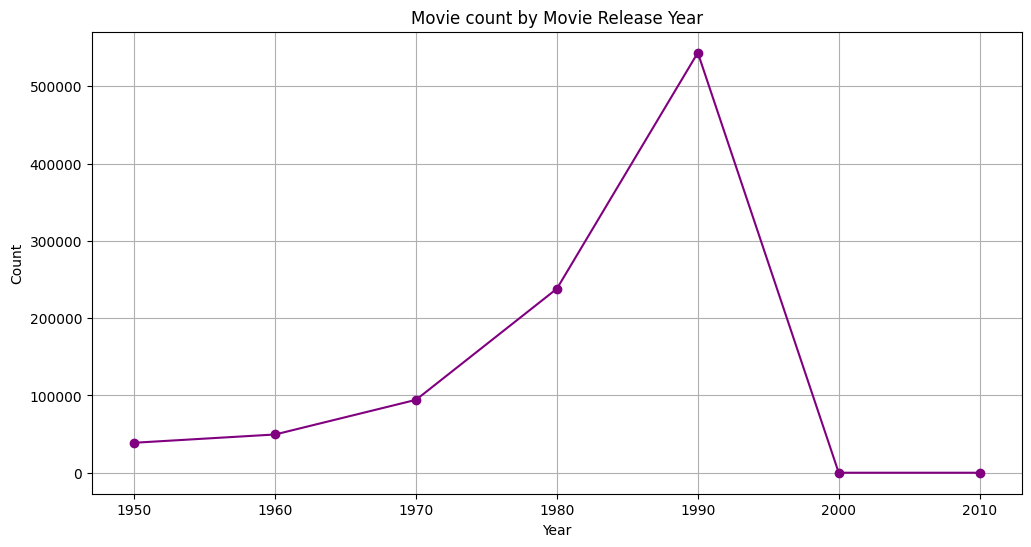

In [ ]:
# Visualization 5: Average Ratings by Movie Release Year
movie_counts_by_year = df_main.groupby('decade')['MovieID'].count()
plt.figure(figsize=(12, 6))
movie_counts_by_year.plot(kind='line', marker='o', color='purple')
plt.title('Movie count by Movie Release Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [ ]:
# Visualization 5: Average Ratings by Movie Release Year
average_ratings_by_year = df_main.groupby('Year')['Rating'].mean()
plt.figure(figsize=(12, 6))
average_ratings_by_year.plot(kind='line', marker='o', color='purple')
plt.title('Average Ratings by Year')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()


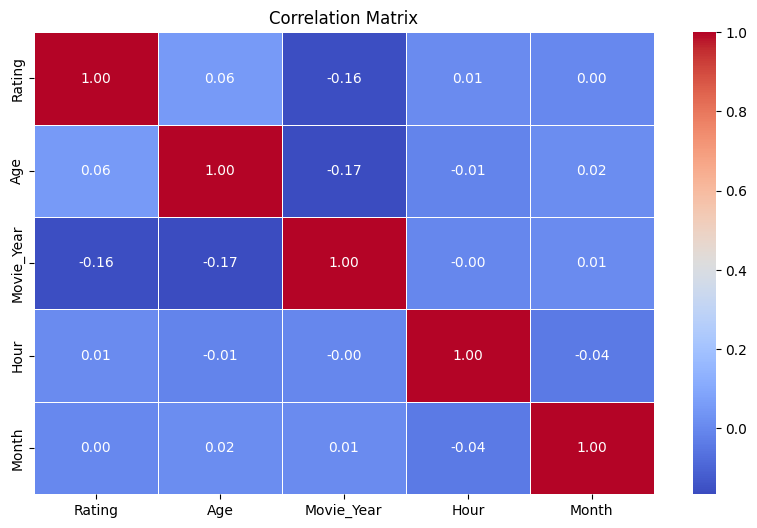

In [ ]:
# Visualization 6: Heatmap of Correlation Between Features
numeric_cols = ['Rating', 'Age', 'Movie_Year','Hour','Month']
corr_matrix = df_main[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [ ]:
df_main.columns.tolist()

['UserID',
 'MovieID',
 'Rating',
 'Timestamp',
 'Gender',
 'Age',
 'Occupation',
 'Zip-code',
 'Title',
 'Genres',
 'Day',
 'Month',
 'Year',
 'Hour',
 'AgeGroup',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western',
 'Movie_Year']

In [ ]:
df_main.shape

(1000209, 34)

# **RECOMMENDATION MODELS**

In [ ]:
import pandas as pd


# Create the pivot table with UserID as rows and MovieID as columns
pivot_table = df_main.pivot_table(index='UserID', columns='MovieID', values='Rating')

# Fill NaN values with 0 or any other suitable value (e.g., mean rating of the user or movie)
pivot_table = pivot_table.fillna(0)


In [ ]:
pivot_table.head()

MovieID  1     2     3     4     5     6     7     8     9     10    11    \
UserID                                                                      
1         5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   2.0   0.0   0.0   0.0   0.0   0.0   

MovieID  12    13    14    15    16    17    18    19    20    21    22    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   3.0   0.0   0.0   0.0   0.0   0.0   0.0   

MovieID  23    24    25    26    27    28    29    30    31    32    33    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   1.0   0.0   0.0   0.0   0.0   5.0   0.0   0.0   4.0   0.0   

MovieID  34    35    36    37    38    39    40    41    42    43    44    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         4.0   0.0   3.0   0.0   0.0   3.0   0.0   4.0   0.0   0.0   0.0   

MovieID  45    46    47    48    49    50    52    53    54    55    56    \
UserID                                                                      
1         0.0   0.0   0.0   5.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   3.0   0.0   0.0   5.0   2.0   0.0   0.0   0.0   0.0   

MovieID  57    58    59    60    61    62    63    64    65    66    67    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

MovieID  68    69    70    71    72    73    74    75    76    77    78    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
2         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
3         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
4         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
5         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

MovieID  79    80    81    82    83    84    85    86    87    88    89    \
UserID                                                                      
1         0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.

# **PEARSON CORRELATION**

In [ ]:
# Item-based Approach and Pearson Correlation

from scipy.spatial.distance import correlation

# Calculate Pearson Correlation for item-based similarity
item_similarity = pivot_table.corr(method='pearson')

print(item_similarity.head(1))  # Show the top rows of item similarity matrix



MovieID  1         2         3         4         5         6         7     \
MovieID                                                                     
1         1.0  0.262649  0.146536  0.109375  0.170156  0.168087  0.189333   

MovieID      8         9         10        11        12        13        14    \
MovieID                                                                         
1        0.082963  0.045705  0.215653  0.249066  0.083601  0.151035  0.073021   

MovieID      15        16       17        18        19        20        21    \
MovieID                                                                        
1        0.118634  0.147759  0.15007  0.116103  0.149653  0.100849  0.271455   

MovieID      22        23        24        25        26        27        28    \
MovieID                                                                         
1        0.140574  0.100592  0.104658  0.143807  0.073113  0.077911  0.060849   

MovieID      29        30        31    

In [ ]:
df_main['MovieID'].value_counts()

MovieID
2858    3428
260     2991
1196    2990
1210    2883
480     2672
        ... 
3458       1
2226       1
1815       1
398        1
2909       1
Name: count, Length: 3706, dtype: int64

In [ ]:
movie_id_to_title = pd.Series(df_main['Title'].values, index=df_main['MovieID']).to_dict()


In [ ]:
given_movie = df_main[df_main['Title']=='Liar Liar ']

In [ ]:
given_movie

UserID  MovieID  Rating           Timestamp Gender  Age  \
324          5     1485       3 2000-12-31 07:09:36      M   25   
1628        15     1485       3 2000-12-30 17:49:08      M   25   
2738        22     1485       1 2000-12-30 05:27:54      M   18   
3624        26     1485       1 2000-12-30 01:20:20      M   25   
4172        31     1485       2 2000-12-29 20:31:25      M   56   
...        ...      ...     ...                 ...    ...  ...   
986879    5957     1485       3 2000-05-15 15:43:28      M   18   
987303    5960     1485       4 2000-04-29 17:28:59      F   45   
989036    5972     1485       4 2000-07-14 22:48:53      F   25   
993099    6000     1485       4 2000-04-28 01:07:04      M   45   
995999    6016     1485       2 2000-04-26 21:43:48      M   45   

                  Occupation Zip-code       Title    Genres  Day  Month  Year  \
324                   writer    55455  Liar Liar   [Comedy]   31     12  2000   
1628    executive/managerial    22903  Liar Liar   [Comedy]   30     12  2000   
2738               scientist    53706  Liar Liar   [Comedy]   30     12  2000   
3624    executive/managerial    23112  Liar Liar   [Comedy]   30     12  2000   
4172    executive/managerial    06840  Liar Liar   [Comedy]   29     12  2000   
...                      ...      ...         ...       ...  ...    ...   ...   
986879                writer    02038  Liar Liar   [Comedy]   15      5  2000   
987303                 other    70460  Liar Liar   [Comedy]   29      4  2000   
989036                writer    55428  Liar Liar   [Comedy]   14      7  2000   
993099   technician/engineer    30075  Liar Liar   [Comedy]   28      4  2000   
995999     academic/educator    37209  Liar Liar   [Comedy]   26      4  2000   

        Hour  AgeGroup  Action  Adventure  Animation  Children's  Comedy  \
324        7     25-34       0          0          0           0       1   
1628      17     25-34       0          0          0           0       1   
2738       5     18-24       0          0          0           0       1   
3624       1     25-34       0          0          0           0       1   
4172      20  56 Above       0          0          0           0       1   
...      ...       ...     ...        ...        ...         ...     ...   
986879    15     18-24       0          0          0           0       1   
987303    17     45-49       0          0          0           0       1   
989036    22     25-34       0          0          0           0       1   
993099     1     45-49       0          0          0           0       1   
995999    21     45-49       0          0          0           0       1   

        Crime  Documentary  Drama  Fantasy  Film-Noir  Horror  Musical  \
324         0            0      0        0          0       0        0   
1628        0            0      0        0          0       0        0   
2738        0            0      0        0          0       0        0   
3624        0            0      0        0          0       0        0   
4172        0            0      0        0          0       0        0   
...       ...          ...    ...      ...        ...     ...      ...   
986879      0            0      0        0          0       0        0   
987303      0            0      0        0          0       0        0   
989036      0            0      0        0          0       0        0   
993099      0            0      0        0          0       0        0   
995999      0            0      0        0          0       0        0   

        Mystery  Romance  Sci-Fi  Thriller  War  Western  Movie_Year decade  
324           0        0       0         0    0        0        1997   1990  
1628          0        0       0         0    0        0        1997   1990  
2738          0        0       0         0    0        0        1997   1990  
3624          0        0       0         0    0        0        1997   1990  
4172          0        0       0      

In [ ]:
def recommend_movies(movie_name, item_similarity, top_n=5):
    similar_movies = item_similarity[movie_name].sort_values(ascending=False)
    similar_movies = similar_movies.drop(movie_name)  # Remove the movie itself
    top_movie_ids = similar_movies.head(top_n).index.tolist()

    top_movie_titles = [movie_id_to_title[movie_id] for movie_id in top_movie_ids]

    return top_movie_titles

# Input from the user (e.g., movie name)
movie_input = 1485

# Call the function to get top 5 similar movies
recommendations = recommend_movies(movie_input, item_similarity, top_n=5)
print(recommendations)


['Mrs. Doubtfire ', 'Dumb & Dumber ', 'Ace Ventura: Pet Detective ', 'Home Alone ', 'Wedding Singer, The ']


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the item similarity matrix
item_similarity_cosine = cosine_similarity(pivot_table.T)

# Print the item similarity matrix
print(item_similarity_cosine)

# User similarity matrix
user_similarity_cosine = cosine_similarity(pivot_table)

# Print the user similarity matrix
print(user_similarity_cosine)


[[1.         0.39034871 0.26794263 ... 0.09347942 0.04282933 0.18269056]
 [0.39034871 1.         0.24094645 ... 0.08701306 0.02606255 0.12218461]
 [0.26794263 0.24094645 1.         ... 0.0622576  0.01007255 0.097786  ]
 ...
 [0.09347942 0.08701306 0.0622576  ... 1.         0.20280851 0.2346385 ]
 [0.04282933 0.02606255 0.01007255 ... 0.20280851 1.         0.19297221]
 [0.18269056 0.12218461 0.097786   ... 0.2346385  0.19297221 1.        ]]
[[1.         0.09638153 0.12060981 ... 0.         0.17460369 0.13359025]
 [0.09638153 1.         0.1514786  ... 0.06611767 0.0664575  0.21827563]
 [0.12060981 0.1514786  1.         ... 0.12023352 0.09467506 0.13314404]
 ...
 [0.         0.06611767 0.12023352 ... 1.         0.16171426 0.09930008]
 [0.17460369 0.0664575  0.09467506 ... 0.16171426 1.         0.22833237]
 [0.13359025 0.21827563 0.13314404 ... 0.09930008 0.22833237 1.        ]]


In [ ]:
from scipy.sparse import csr_matrix

# Convert the pivot table to a CSR matrix
pivot_csr = csr_matrix(pivot_table.values)

print(pivot_csr.shape)  # Print the shape of the CSR matrix


(6040, 3706)


In [ ]:
user_similarity_matrix = pd.DataFrame(user_similarity_cosine, index=pivot_table.index, columns=pivot_table.index)
user_similarity_matrix.head()

UserID      1         2         3         4         5         6         7     \
UserID                                                                         
1       1.000000  0.096382  0.120610  0.132455  0.090158  0.179222  0.059678   
2       0.096382  1.000000  0.151479  0.171176  0.114394  0.100865  0.305787   
3       0.120610  0.151479  1.000000  0.151227  0.062907  0.074603  0.138332   
4       0.132455  0.171176  0.151227  1.000000  0.045094  0.013529  0.130339   
5       0.090158  0.114394  0.062907  0.045094  1.000000  0.047449  0.126257   

UserID      8         9         10        11        12        13        14    \
UserID                                                                         
1       0.138241  0.226148  0.255288  0.130408  0.110303  0.123538  0.072058   
2       0.203337  0.190198  0.226861  0.197176  0.096020  0.317219  0.091739   
3       0.077656  0.126457  0.213655  0.173822  0.083942  0.277244  0.067802   
4       0.100856  0.093651  0.120738  0.068219  0.066183  0.195515  0.056206   
5       0.220817  0.261330  0.117052  0.220978  0.044568  0.117553  0.141935   

UserID      15        16        17        18        19        20        21    \
UserID                                                                         
1       0.086045  0.041853  0.129793  0.248032  0.217807  0.031747  0.124362   
2       0.303353  0.000000  0.247334  0.238734  0.211295  0.190865  0.030331   
3       0.202989  0.045007  0.115349  0.216038  0.215527  0.047795  0.080700   
4       0.112381  0.000000  0.148095  0.192354  0.201668  0.108959  0.050174   
5       0.211528  0.084638  0.217625  0.148160  0.163334  0.136532  0.066167   

UserID      22        23        24        25        26        27        28    \
UserID                                                                         
1       0.094217  0.096864  0.167240  0.143216  0.124465  0.053589  0.167366   
2       0.233648  0.179795  0.191792  0.178382  0.196156  0.093495  0.202275   
3       0.186996  0.103011  0.215365  0.174347  0.161611  0.130621  0.233270   
4       0.102524  0.134413  0.101998  0.219205  0.101515  0.097534  0.214199   
5       0.178708  0.236826  0.147311  0.125967  0.078329  0.099106  0.155230   

UserID      29        30        31        32        33        34        35    \
UserID                                                                         
1       0.047570  0.207958  0.061391  0.078334  0.193134  0.160925  0.107190   
2       0.198333  0.149022  0.082501  0.144229  0.279876  0.108465  0.160885   
3       0.163334  0.075032  0.179895  0.052146  0.223142  0.130975  0.117276   
4       0.360636  0.117389  0.062252  0.044614  0.194090  0.049225  0.107914   
5       0.081097  0.212894  0.039300  0.184503  0.179299  0.097372  0.115796   

UserID      36        37        38        39        40        41        42    \
UserID                                                                         
1       0.160287  0.066065  0.127864  0.114402  0.051928  0.129148  0.098216   
2       0.223877  0.118799  0.080458  0.088622  0.086987  0.132210  0.206034   
3       0.232865  0.099942  0.027500  0.082015  0.173398  0.118777  0.246037   
4       0.186907  0.036684  0.000000  0.042493  0.076745  0.132548  0.236793   
5       0.210481  0.045582  0.090321  0.267547  0.039478  0.049092  0.112850   

UserID      43        44        45        46        47        48        49    \
UserID                                                                         
1       0.109420  0.206718  0.113316  0.000000  0.133637  0.241842  0.210879   
2       0.067441  0.188046  0.094911  0.002380  0.105568  0.308780  0.216793   
3       0.139516  0.270161  0.099406  0.006031  0.011198  0.235850  0.143268   
4       0.000000  0.148400  0.000000  0.000000  0.000000  0.182785  0.161938   
5       0.091342  0.097290  0.086539  0.000737  0.111672  0.194377  0.125578   

UserID      50        51        52        53        54        55        5

In [ ]:
item_similarity_matrix = pd.DataFrame(item_similarity_cosine, index=pivot_table.T.index, columns=pivot_table.T.index)
item_similarity_matrix.head()

MovieID      1         2         3         4         5         6         7     \
MovieID                                                                         
1        1.000000  0.390349  0.267943  0.178789  0.256569  0.347373  0.301490   
2        0.390349  1.000000  0.240946  0.155457  0.249970  0.244827  0.262772   
3        0.267943  0.240946  1.000000  0.192788  0.308290  0.187020  0.292230   
4        0.178789  0.155457  0.192788  1.000000  0.271990  0.125170  0.220024   
5        0.256569  0.249970  0.308290  0.271990  1.000000  0.148114  0.305107   

MovieID      8         9         10        11        12        13        14    \
MovieID                                                                         
1        0.125709  0.106620  0.377459  0.418186  0.151041  0.192713  0.147833   
2        0.196521  0.158469  0.386200  0.284927  0.168219  0.195473  0.124239   
3        0.092122  0.128378  0.245601  0.291243  0.165363  0.080865  0.102600   
4        0.049554  0.060334  0.133707  0.244019  0.096681  0.068000  0.152430   
5        0.095512  0.138392  0.237681  0.311110  0.200872  0.107860  0.112343   

MovieID      15        16        17        18        19        20        21    \
MovieID                                                                         
1        0.176201  0.302060  0.322860  0.182518  0.250934  0.169679  0.460979   
2        0.255863  0.228052  0.189604  0.180663  0.260758  0.208641  0.292522   
3        0.119391  0.180576  0.170706  0.157587  0.281250  0.183754  0.229553   
4        0.110493  0.187865  0.183817  0.118184  0.203881  0.147783  0.165405   
5        0.153462  0.160651  0.151431  0.136507  0.324054  0.171940  0.198390   

MovieID      22        23        24        25        26        27        28    \
MovieID                                                                         
1        0.249662  0.159897  0.256634  0.330253  0.130790  0.118277  0.145784   
2        0.248795  0.191585  0.287596  0.217447  0.130584  0.132203  0.066867   
3        0.222051  0.126606  0.164934  0.193659  0.080169  0.121314  0.061791   
4        0.200489  0.088434  0.134320  0.189515  0.103137  0.219372  0.082147   
5        0.207493  0.141141  0.161215  0.165199  0.113194  0.206153  0.062652   

MovieID      29        30        31        32        33        34        35    \
MovieID                                                                         
1        0.236006  0.078642  0.175218  0.458306  0.030269  0.563637  0.089268   
2        0.199773  0.036030  0.198238  0.315625  0.005489  0.307940  0.070643   
3        0.084583  0.026332  0.168032  0.191045  0.009272  0.219507  0.073083   
4        0.058694  0.030757  0.242470  0.133025  0.000000  0.189986  0.124700   
5        0.046209  0.030915  0.225139  0.160416  0.035624  0.228469  0.054760   

MovieID      36        37        38        39        40        41        42    \
MovieID                                                                         
1        0.343616  0.026936  0.073897  0.501275  0.048902  0.184036  0.178895   
2        0.219960  0.012790  0.096894  0.300970  0.041443  0.101426  0.178458   
3        0.178275  0.005401  0.112515  0.275311  0.020741  0.080586  0.116191   
4        0.162046  0.000000  0.100611  0.234640  0.064550  0.066567  0.136260   
5        0.160273  0.055335  0.176855  0.267694  0.029884  0.070939  0.089772   

MovieID      43        44        45        46        47        48        49    \
MovieID                                                                         
1        0.122084  0.238695  0.316043  0.170863  0.420075  0.331673  0.057317   
2        0.076050  0.303428  0.202066  0.159705  0.291598  0.338246  0.070796   
3        0.066815  0.216535  0.180092  0.186985  0.225337  0.207443  0.042706   
4        0.124946  0.143486  0.213722  0.227390  0.162338  0.168337  0.039381   
5        0.081196  0.154342  0.196351  0.169687  0.188363  0.226715  0.068370   

MovieID      50        5

In [ ]:
type(item_similarity)

pandas.core.frame.DataFrame

# **TOP_5_MOVIE_RECOMMENDATIONS_BASED_ON COSINE_SIMILARITY**

In [ ]:
import pandas as pd

def top_5_recommendations(movie_id, item_similarity_cosine, top_n=5):
    # Ensure item_similarity_cosine is handled as a DataFrame
    if isinstance(item_similarity_cosine, pd.DataFrame):
        similar_scores = item_similarity_cosine[movie_id]
    else:
        similar_scores = pd.Series(item_similarity_cosine[movie_id], index=range(len(item_similarity_cosine)))

    # Convert to Series and set indices if necessary
    if not isinstance(similar_scores, pd.Series):
        similar_scores = pd.Series(similar_scores, index=item_similarity_cosine.index if isinstance(item_similarity_cosine, pd.DataFrame) else range(len(item_similarity_cosine)))

    # Remove the movie itself
    similar_scores = similar_scores.drop(movie_id, errors="ignore")

    # Get the top N similar movies
    top_recommendations = similar_scores.nlargest(top_n).index.tolist()

    # Map MovieID to Titles
    top_recommendations_final = [movie_id_to_title[movie_id] for movie_id in top_recommendations]

    return top_recommendations_final

# Example inputs
item_similarity_cosine = item_similarity_matrix


movie_input = 1485
top_recommendations = top_5_recommendations(movie_input, item_similarity_cosine, top_n=5)

print(top_recommendations)


['Mrs. Doubtfire ', 'Ace Ventura: Pet Detective ', 'Dumb & Dumber ', 'Home Alone ', "Wayne's World "]


# **KNN Algorithm for Similar Movies**

In [ ]:
from sklearn.neighbors import NearestNeighbors

# Fit KNN model to the pivot table (for item similarity)
knn_model = NearestNeighbors(n_neighbors=5, metric='cosine')
knn_model.fit(pivot_table.T)

# Input movie index
distances, indices = knn_model.kneighbors(pivot_table.T, n_neighbors= 5)

movie_index = pivot_table.columns.get_loc(movie_input)  # Get index of the movie name

# Get the 5 most similar movies
distances_input_movie, indices_input_movie = knn_model.kneighbors([pivot_table.iloc[:, movie_index]])

# Print the top 5 similar movies
print(pivot_table.columns[indices_input_movie[0]].tolist())


[1210, 1196, 260, 1240, 1198]


In [ ]:
top_recommendations_KNN = [movie_id_to_title[movie_id] for movie_id in pivot_table.columns[indices[0]].tolist()]


In [ ]:
top_recommendations_KNN

['Toy Story ', 'Toy Story 2 ', 'Groundhog Day ', 'Aladdin ', "Bug's Life, A "]

In [ ]:
result = pd.DataFrame(indices, columns=['Title1', 'Title2', 'Title3', 'Title4', 'Title5'])
result

Title1  Title2  Title3  Title4  Title5
0          0    2898    1173     574    2162
1          1    3256     632      58    1873
2          2    3218     573     583     525
3          3    1488     212    1482     463
4          4     572    2745    1901     486
...      ...     ...     ...     ...     ...
3701    3701    3651    3664    3647    3248
3702    3702    3663    3651    3664    3091
3703    3703    3702    2564    3640    3705
3704    3704    3668    2974    3578    3634
3705    3705    3651    3647    3091    3664

[3706 rows x 5 columns]

In [ ]:
pip install cmfrec


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.4/268.4 kB 15.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached findblas-0.1.26.post1-py3-none-any.whl
  Created wheel for cmfrec: filename=cmfrec-3.5.1.post11-cp311-cp311-linux_x86_64.whl size=6280181 sha256=708c2d23469c3d8e867496a77673acceac6f59f6c24dc11fe5763ef32944427d
  Stored in directory: /root/.cache/pip/wheels/2a/e9/be/2c742b9eaa1a4b11b23a5b79dbd93ec9b445e317573d4f03ac
Successfully built cmfrec


In [ ]:
pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 8.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505175 sha256=9149be8d3524ea70d68f206fdf868b1e6abd542f0c9bde1aa41c8c8d5d8f35d4
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


# **MATRIX FACTORIZATION USING SURPRISE LIBRARY**

In [ ]:

from cmfrec import CMF
from surprise.model_selection import train_test_split
from surprise.accuracy import rmse  # Import the correct accuracy function


from surprise.model_selection import GridSearchCV


In [ ]:
df_new = df_main[['UserID', 'MovieID', 'Rating']]

In [ ]:
from surprise import SVD, Dataset, Reader


In [ ]:
# Use Surprise's Reader to specify the rating scale
reader = Reader(rating_scale=(1, 5))  # Adjust the rating scale if your data has a different range
data_surprise = Dataset.load_from_df(df_new[['UserID', 'MovieID', 'Rating']], reader)

# Train-test split
trainset, testset = train_test_split(data_surprise, test_size=0.2, random_state=42)

# Train an SVD model
svd = SVD(n_factors=4, random_state=42)
svd.fit(trainset)

In [ ]:
# Evaluate RMSE on the test set
predictions = svd.test(testset)
rmse = rmse(predictions)
print("RMSE:", rmse)

RMSE: 0.8830
RMSE: 0.8829543395348458


In [ ]:
# Train an SVD model
svd1 = SVD(n_factors=2, random_state=42)
svd1.fit(trainset)

In [ ]:
# Extract embeddings for item-item similarity
user_embeddings = svd1.pu  # User latent factors
item_embeddings = svd1.qi  # Item latent factors

print("User Embeddings Shape:", user_embeddings.shape)
print("Item Embeddings Shape:", item_embeddings.shape)


User Embeddings Shape: (6040, 2)
Item Embeddings Shape: (3675, 2)


In [ ]:
def calculate_mape(predictions):
    y_true = [pred.r_ui for pred in predictions]
    y_pred = [pred.est for pred in predictions]
    return np.mean(np.abs((np.array(y_true) - np.array(y_pred)) / np.array(y_true))) * 100

mape = calculate_mape(predictions)
print("MAPE:", mape)


MAPE: 26.95129372787126


In [ ]:
# Compute cosine similarity between items using item embeddings
item_similarity = cosine_similarity(item_embeddings)

# Example: Get top-5 similar items for a given item (e.g., MovieID 101)
item_index = 0  # Example item index (MovieID 101)
similar_items = np.argsort(-item_similarity[item_index])[:6]
print("Top 5 similar items to MovieID", item_index, ":", similar_items)


Top 5 similar items to MovieID 0 : [   0  134  812  745   68 1562]


In [ ]:
# Compute cosine similarity between users using user embeddings
user_similarity = cosine_similarity(user_embeddings)

# Example: Get top-5 similar users for a given user (e.g., UserID 1)
user_index = 0  # Example user index (UserID 1)
similar_users = np.argsort(-user_similarity[user_index])[:6]
print("Top 5 similar users to UserID", user_index, ":", similar_users)


Top 5 similar users to UserID 0 : [   0 5345 2876 3451 1571  152]


<ipython-input-317-c78a1da2bd20>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(user_embeddings[:, 0],user_embeddings[:, 1], cmap = 'hot')


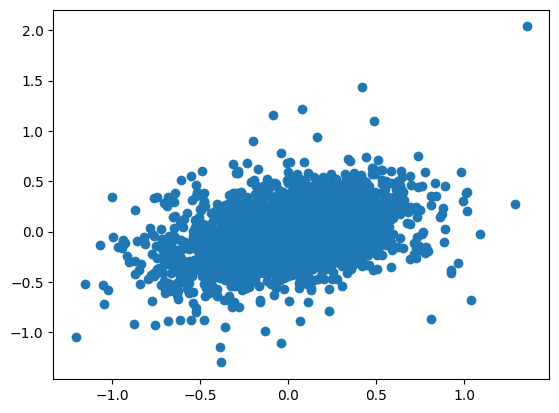

In [ ]:
plt.scatter(user_embeddings[:, 0],user_embeddings[:, 1], cmap = 'hot')


<ipython-input-318-8afb183b83a4>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(item_embeddings[:, 0],item_embeddings[:, 1], cmap = 'hot')


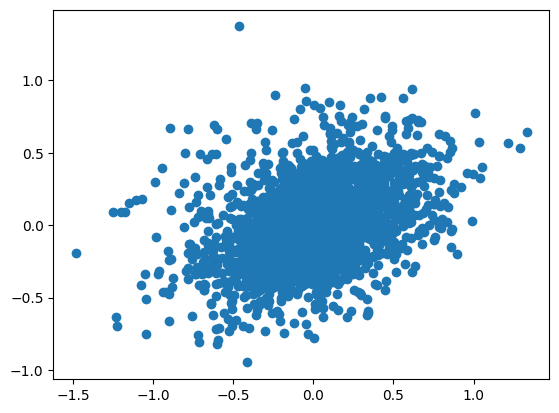

In [ ]:
plt.scatter(item_embeddings[:, 0],item_embeddings[:, 1], cmap = 'hot')


In [ ]:
param_grid = {
    'n_factors': [2, 4, 6,8,10],  # Number of latent factors
    'lr_all': [0.002, 0.005, 0.01],  # Learning rate
    'reg_all': [0.02, 0.1, 0.4]  # Regularization
}


In [ ]:
# Step 3: Perform Grid Search
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3, n_jobs=-1)
grid_search.fit(data_surprise)

# Step 4: Retrieve the best parameters and score
print("Best RMSE score:", grid_search.best_score['rmse'])
print("Best parameters (RMSE):", grid_search.best_params['rmse'])

# Step 5: Train and test with best parameters
best_params = grid_search.best_params['rmse']
best_svd = SVD(n_factors=best_params['n_factors'],
               lr_all=best_params['lr_all'],
               reg_all=best_params['reg_all'])

trainset, testset = train_test_split(data_surprise, test_size=0.25)
best_svd.fit(trainset)
predictions = best_svd.test(testset)

# Step 6: Evaluate the model
print("Test RMSE:",rmse(predictions))


Best RMSE score: 0.8737136110373229
Best parameters (RMSE): {'n_factors': 6, 'lr_all': 0.01, 'reg_all': 0.02}
RMSE: 0.8668
Test RMSE: 0.8667851640693301


# **Matrix Factorization Using cmfrec**


In [ ]:
trainset = data_surprise.build_full_trainset()


In [ ]:
# Prepare the data for cmfrec
user_item_ratings = df_main.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)
user_item_ratings_matrix = user_item_ratings.values


In [ ]:
# Train a CMF model with 4 latent factors
cmf_model = CMF(k=4, random_state=42)
cmf_model.fit(user_item_ratings_matrix)

# Extract embeddings for item-item similarity
user_embeddings_cmf = cmf_model.A_
item_embeddings_cmf = cmf_model.B_

print("User Embeddings (CMF) Shape:", user_embeddings_cmf.shape)
print("Item Embeddings (CMF) Shape:", item_embeddings_cmf.shape)


User Embeddings (CMF) Shape: (6040, 4)
Item Embeddings (CMF) Shape: (3706, 4)


In [ ]:
cmf_model1 = CMF(method="als", k=2, lambda_=0.1, user_bias=False, item_bias=False, verbose=False)
cmf_model1.fit(user_item_ratings_matrix)

Collective matrix factorization model
(explicit-feedback variant)


<ipython-input-308-c73ab5eba539>:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cmf_model1.A_[:, 0],cmf_model1.A_[:, 1], cmap = 'hot')


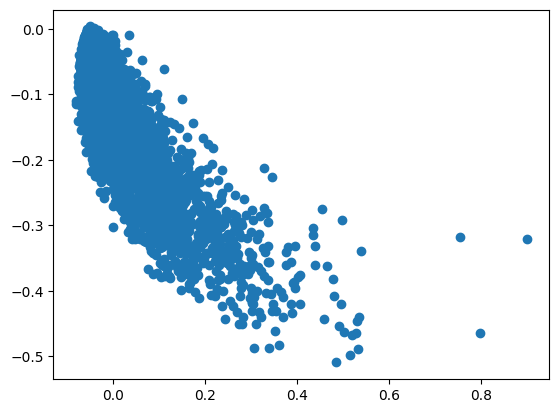

In [ ]:
#### USER EMBEDDINGS

plt.scatter(cmf_model1.A_[:, 0],cmf_model1.A_[:, 1], cmap = 'hot')


<ipython-input-309-3efe832e1a43>:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cmf_model1.B_[:, 0],cmf_model1.B_[:, 1], cmap = 'hot')


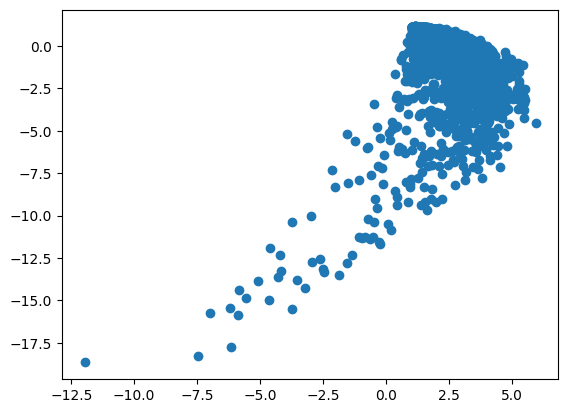

In [ ]:
plt.scatter(cmf_model1.B_[:, 0],cmf_model1.B_[:, 1], cmap = 'hot')


In [ ]:
# Compute cosine similarity between items using item embeddings
item_similarity = cosine_similarity(item_embeddings_cmf)

# Example: Get top-5 similar items for a given item (e.g., MovieID 101)
item_index = 0  # Example item index (MovieID 101)
similar_items = np.argsort(-item_similarity[item_index])[:6]
print("Top 5 similar items to MovieID", item_index, ":", similar_items)


Top 5 similar items to MovieID 0 : [   0  581  578 1199 1900  284]


In [ ]:
# similar_items = []
# for i in similar_items:
#     title = df_main[df_main['MovieID'] == i]['Title'].values
#     similar_items.append(title)
# similar_items

[]

In [ ]:
# Compute user-user similarity using cosine similarity on user embeddings
user_similarity = cosine_similarity(user_embeddings_cmf)

# Example: Get top-5 similar users for a given user (e.g., UserID 1)
user_index = 0  # Example: UserID 1 corresponds to index 0
similar_users = np.argsort(-user_similarity[user_index])[:6]
print(f"Top 5 similar users to UserID {user_index}:", similar_users)


Top 5 similar users to UserID 0: [   0 2812 5342 2597 2398  170]


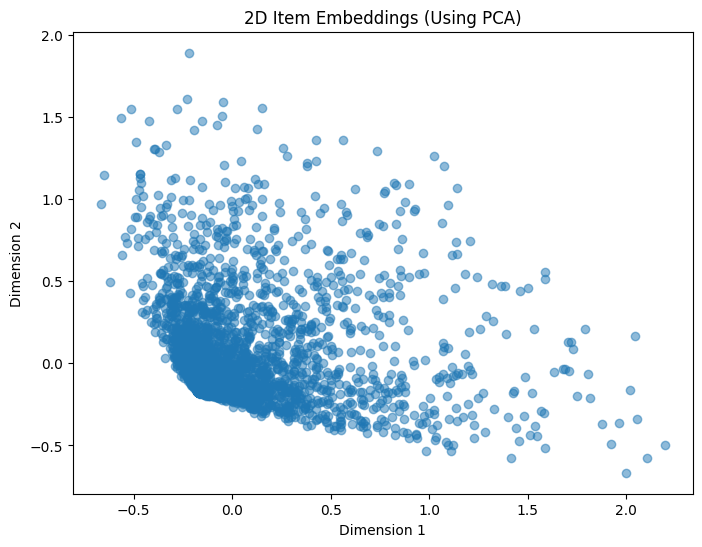

In [ ]:
# Reduce item embeddings to 2D using PCA
pca = PCA(n_components=2)
item_embeddings_2d = pca.fit_transform(item_embeddings_cmf)

# Plot the 2D item embeddings
plt.figure(figsize=(8, 6))
plt.scatter(item_embeddings_2d[:, 0], item_embeddings_2d[:, 1], alpha=0.5)
plt.title('2D Item Embeddings (Using PCA)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()



In [ ]:
# Reduce user embeddings to 2D using PCA
user_embeddings_2d = pca.fit_transform(user_embeddings)

# Plot the 2D user embeddings
plt.figure(figsize=(8, 6))
plt.scatter(user_embeddings_2d[:, 0], user_embeddings_2d[:, 1], alpha=0.5)
plt.title('2D User Embeddings (Using PCA)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()
